In [1]:
import struct
import numpy as np
from matplotlib import pyplot
import matplotlib as mpl

In [2]:
"""
Modified from https://gist.github.com/akesling/5358964
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""
def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """
    with open('../../data/raw/train-labels-idx1-ubyte', 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open('../../data/raw/train-images-idx3-ubyte', 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

In [3]:
def show(image):
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

def ascii_show(image):
    for y in image:
        row = ""
        for x in y:
            row += '{:02X}'.format(x)+' '
        print(row)

In [4]:
training_data = list(read(dataset='traing',path='../data/raw/'))

Max Pooling


/Users/Craig/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/Craig/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


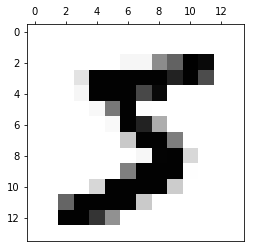

Average Pooling


/Users/Craig/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


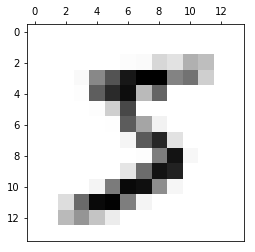

Max Pooling


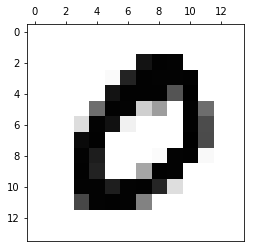

Average Pooling


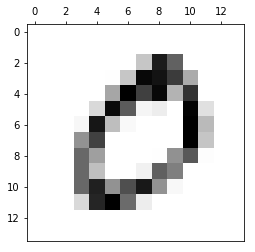

Max Pooling


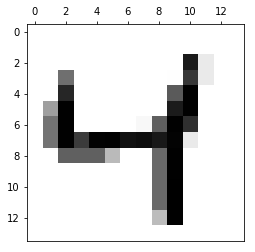

Average Pooling


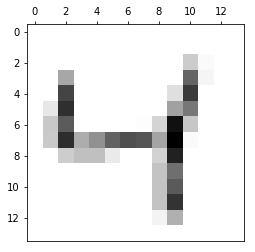

Max Pooling


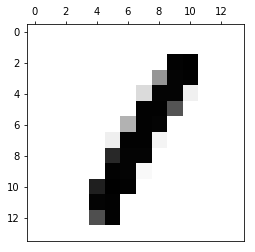

Average Pooling


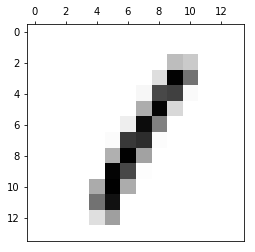

Max Pooling


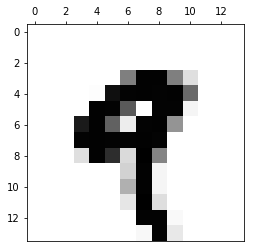

Average Pooling


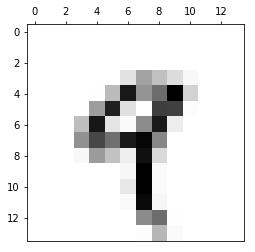

In [5]:
for i in range(5):
    label, pixel = training_data[i]
    pool2x2 = np.zeros([pixel.shape[0]/2,pixel.shape[0]/2])
    for i in range(0,pixel.shape[0],2):
        for j in range(0,pixel.shape[0],2):
            M = np.max(pixel[i:i+2,j:j+2])
            pool2x2[(i/2),(j/2)] = M
    print('Max Pooling')
    show(pool2x2)
    
    for i in range(0,pixel.shape[0],2):
        for j in range(0,pixel.shape[0],2):
            M = np.mean(pixel[i:i+2,j:j+2])
            pool2x2[(i/2),(j/2)] = M
    print('Average Pooling')
    show(pool2x2)